# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sakifa Indira Putri
- **Email:** mc319d5x2380@student.devacademy.id
- **ID Dicoding:** MC319D5X2380

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda ?
- Pertanyaan 2: Apakah terdapat perbedaan yang signifikan antara jumlah penyewaan di hari kerja dengan akhir pekan ?
- Pertanyaan 3: Bagaimana Pola Penyewaan Sepeda Berdasarkan Waktu (Harian, Mingguan, atau Bulanan)?
- Pertanyaan 4: Pada jam berapa jumlah penyewaan sepeda paling banyak dan paling sedikit ?
- Pertanyaan 5: Apakah perubahan suhu mempengaruhi jumlah penyewaan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [3357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats



## Data Wrangling

### Gathering Data

In [3358]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

In [3359]:
print("Day Dataset:")
display(day_df.head())

print("\nHour Dataset:")
display(hour_df.head())

Day Dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Hour Dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3360]:
day_df.shape

(731, 16)

In [3361]:
hour_df.shape

(17379, 17)

**Insight:**
- Dapat dilihat bahwa pada data diatas terdapat 5 baris pertama dari dataset day dan dataset hour
- Dataset day memiliki jumlah baris = 731 dan kolom = 16
- Dataset hour memiliki jumlah baris = 17379 dan kolom = 17

### Assessing Data

Menilai tabel dataset day

In [3362]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [3363]:
# Menampilkan apakah terdapat data duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [3364]:
# Menampilkan jumlah nilai null yang ada pada data
pd.DataFrame({'Nilai yang kosong' :day_df.isnull().sum()})

,Nilai yang kosong
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [3365]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak terdapat missing value dan data duplicate di tiap kolom pada dataset day
- Terdapat type data object pada kolom dteday dan harus diubah menjadi datetime

Menilai tabel dataset hour

In [3366]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3367]:
# Menampilkan apakah terdapat data duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [3368]:
# Menampilkan jumlah nilai null yang ada pada data
pd.DataFrame({'Nilai yang kosong' :hour_df.isnull().sum()})

,Nilai yang kosong
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [3369]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak terdapat missing value dan data duplicate di tiap kolom pada dataset hour
- Terdapat type data object pada kolom dteday dan harus diubah menjadi datetime

### Cleaning Data

Cleaning Dataset Day

In [3370]:
# Memperbaiki type data pada kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [3371]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [3372]:
# Mengganti nama kolom agar lebih mudah dianalisis pada dataset day_df
day_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','hum':'humidity'}, inplace=True)

# Mengubah year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011', '2012'), inplace=True)

# Mengubah month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Mengubah value pada kolom 'weekday' menjadi nama hari agar lebih mudah dibaca dan dipahami
day_df['weekday'] = day_df['weekday'].map({0:'minggu', 1:'senin', 2:'selasa', 3:'rabu', 4:'kamis', 5:'jumat', 6:'sabtu',
})

# Mengubah weathersit menjadi 1:Heavy_RainSnow, 2:Light_RainSnow, 3:Misty, 4:Clear
day_df.weathersit.replace((1,2,3,4), ('Heavy_rainsnow','Light_rainsnow','Misty','Clear'), inplace=True)

# Mengubah value pada kolom 'seasonal' menjadi season
day_df['season'] = day_df['season'].map({ 1:'winter', 2:'fall', 3:'summer', 4:'springer',
})



C:\Users\sakif\AppData\Local\Temp\ipykernel_29064\1919547984.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.year.replace((0,1), ('2011', '2012'), inplace=True)
C:\Users\sakif\AppData\Local\Temp\ipykernel_29064\1919547984.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [3373]:
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,Jan,0,sabtu,0,Light_rainsnow,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,winter,2011,Jan,0,minggu,0,Light_rainsnow,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,winter,2011,Jan,0,senin,1,Heavy_rainsnow,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,winter,2011,Jan,0,selasa,1,Heavy_rainsnow,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,winter,2011,Jan,0,rabu,1,Heavy_rainsnow,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Cleaning Dataset Hour

In [3374]:
# Memperbaiki type data pada kolom dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [3375]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [3376]:
# Mengganti nama kolom agar lebih mudah dianalisis pada dataset hour_df
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','hum':'humidity'}, inplace=True)

# Mengubah year menjadi: 0:2011, 1:2012
hour_df.year.replace((0,1), ('2011', '2012'), inplace=True)

# Mengubah month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Mengubah value pada kolom 'weekday' menjadi nama hari agar lebih mudah dibaca dan dipahami
hour_df['weekday'] = hour_df['weekday'].map({0:'minggu', 1:'senin', 2:'selasa', 3:'rabu', 4:'kamis', 5:'jumat', 6:'sabtu',
})

# Mengubah weathersit menjadi 1:Heavy_RainSnow, 2:Light_RainSnow, 3:Misty, 4:Clear
hour_df.weathersit.replace((1,2,3,4), ('Heavy_rainsnow','Light_rainsnow','Misty','Clear'), inplace=True)

# Mengubah value pada kolom 'seasonal' menjadi season
hour_df['season'] = hour_df['season'].map({ 1:'winter', 2:'fall', 3:'summer', 4:'springer',
})

C:\Users\sakif\AppData\Local\Temp\ipykernel_29064\1642897481.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.year.replace((0,1), ('2011', '2012'), inplace=True)
C:\Users\sakif\AppData\Local\Temp\ipykernel_29064\1642897481.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [3377]:
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,Jan,0,0,sabtu,0,Heavy_rainsnow,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,Jan,1,0,sabtu,0,Heavy_rainsnow,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,Jan,2,0,sabtu,0,Heavy_rainsnow,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,Jan,3,0,sabtu,0,Heavy_rainsnow,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,Jan,4,0,sabtu,0,Heavy_rainsnow,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Dataset day

In [3378]:
#Rata-rata penyewaan sepeda berdasarkan musim
avg_cnt_weather = day_df.groupby('season')['cnt'].mean()
avg_cnt_weather.sort_values(ascending=False).reset_index()

,season,cnt
0,summer,5644.303191
1,fall,4992.331522
2,springer,4728.162921
3,winter,2604.132597


**Insight:**
- Dapat dilihat bahwa rata-rata penyewaan sepeda berdasarkan musim yang memperoleh nilai tertinggi adalah musim panas(summer) dan nilai terendah jatuh pada musim dingin atau salju (winter)

In [3379]:
#Rata-rata penyewaan sepeda berdasarkan hari dalam seminggu
avg_cnt_weekday = day_df.groupby('weekday')['cnt'].mean()
avg_cnt_weekday.sort_values(ascending=False).reset_index()

,weekday,cnt
0,jumat,4690.288462
1,kamis,4667.259615
2,sabtu,4550.542857
3,rabu,4548.538462
4,selasa,4510.663462
5,senin,4338.123810
6,minggu,4228.828571


**Insight:**
- Hari dengan rata-rata penyewaan tertinggi yaitu hari jumat (4690.288462), dan hari terendah jatuh pada hari minggu (4228.828571).

In [3380]:
#Rata-rata penyewaan sepeda berdasarkan tahun
avg_cnt_year = day_df.groupby('year')['cnt'].mean()
avg_cnt_year.sort_values(ascending=False).reset_index()

,year,cnt
0,2012,5599.934426
1,2011,3405.761644


**Insight:**
- Dapat dilihat bahwa pada tahun 2012 memiliki tingkat kenaikan dibandingkan dengan tahun 2011 

### Explore Dataset Hour

In [3381]:
# Menampilkan data penyewaan sepeda bedasarkan jam
hour_df.groupby("hours")["cnt"].sum().reset_index()

,hours,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


**Insight:**
- Dapat dilihat bahwa penyewa terbanyak yaitu berada pada jam 17.00 sedangkan penyewa paling sedikit yaitu pada jam 04.00

In [3382]:
# Menampilkan data penyewaan sepeda berdasarkan jenis pengguna
total_rentals_user_type = pd.DataFrame(hour_df[['registered', 'casual']].sum()).reset_index()
total_rentals_user_type.columns = ['user_type', 'total_rentals']
total_rentals_user_type


,user_type,total_rentals
0,registered,2672662
1,casual,620017


**Insight:**
- Data penyewaan sepeda berdasarkan jenis pengguna lebih banyak penyewa registered (yang sudah terdaftar) dibandingkan penyewa casual (yang tidak berlangganan atau belum terdaftar)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor yang paling mempengaruhi jumlah penyewaan sepeda

In [3383]:
if day_df['season'].dtype == 'object':
    season_mapping = {"spring": 1, "summer": 2, "fall": 3, "winter": 4}
    day_df['season'] = day_df['season'].map(season_mapping)

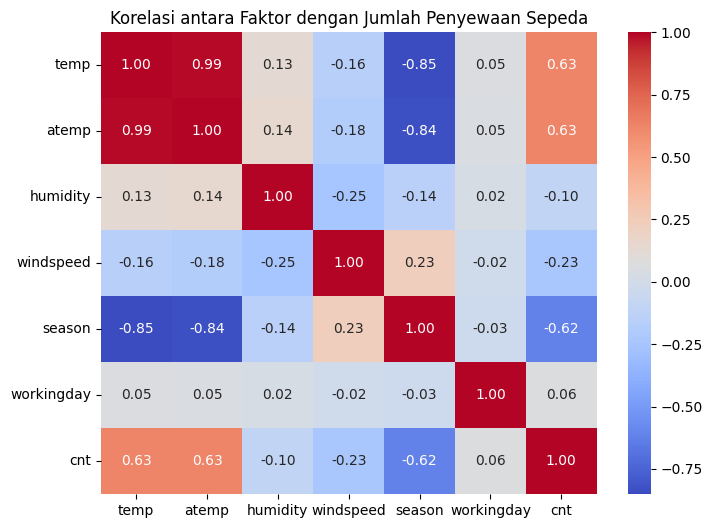

In [3384]:
correlation = day_df[['temp', 'atemp', 'humidity', 'windspeed', 'season', 'workingday', 'cnt']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Faktor dengan Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Berdasarkan korelasi informasi yang diperoleh yaitu jumlah penyewaan sepeda paling dipengaruhi oleh suhu, semakin hangat semakin banyak orang yang menyewa. Pola musiman juga terlihat, dengan jumlah penyewaan yang bervariasi di setiap musim. Hari kerja dan akhir pekan tidak menunjukkan perbedaan besar pada penyewaan sepeda.

### Pertanyaan 2: Perbedaan Penyewaan di hari kerja vs akhir pekan

C:\Users\sakif\AppData\Local\Temp\ipykernel_29064\3330556920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Akhir Pekan', 'Hari Kerja'], y=day_df.groupby('workingday')['cnt'].mean(), palette='coolwarm')


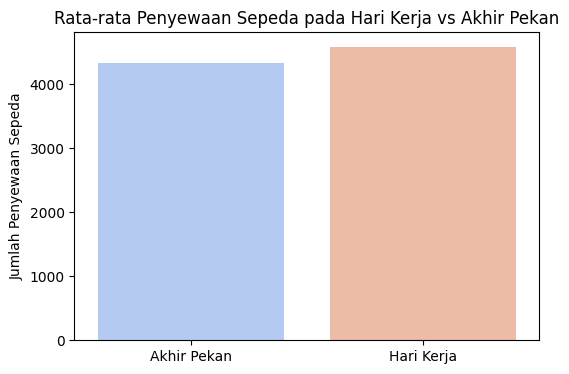

In [3385]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Akhir Pekan', 'Hari Kerja'], y=day_df.groupby('workingday')['cnt'].mean(), palette='coolwarm')
plt.title("Rata-rata Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Dapat dilihat bahwa jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, kemungkinan pada hari kerja lebih produktif dengan menggunakan sepeda, sedangkan pada akhir pekan lebih bersifat rekreasi

### Pertanyaan 3: Bagaimana Pola Penyewaan Sepeda Berdasarkan Waktu (Harian, Mingguan, atau Bulanan)?

C:\Users\sakif\AppData\Local\Temp\ipykernel_29064\944928918.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day', y='cnt', data=day_df, marker='o', ci=None, ax=axes[0])
C:\Users\sakif\AppData\Local\Temp\ipykernel_29064\944928918.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_df, estimator=sum, palette='Blues', ax=axes[1])
C:\Users\sakif\AppData\Local\Temp\ipykernel_29064\944928918.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='cnt', data=day_df, estimator=sum, palette='viridis', ax=axes[2])


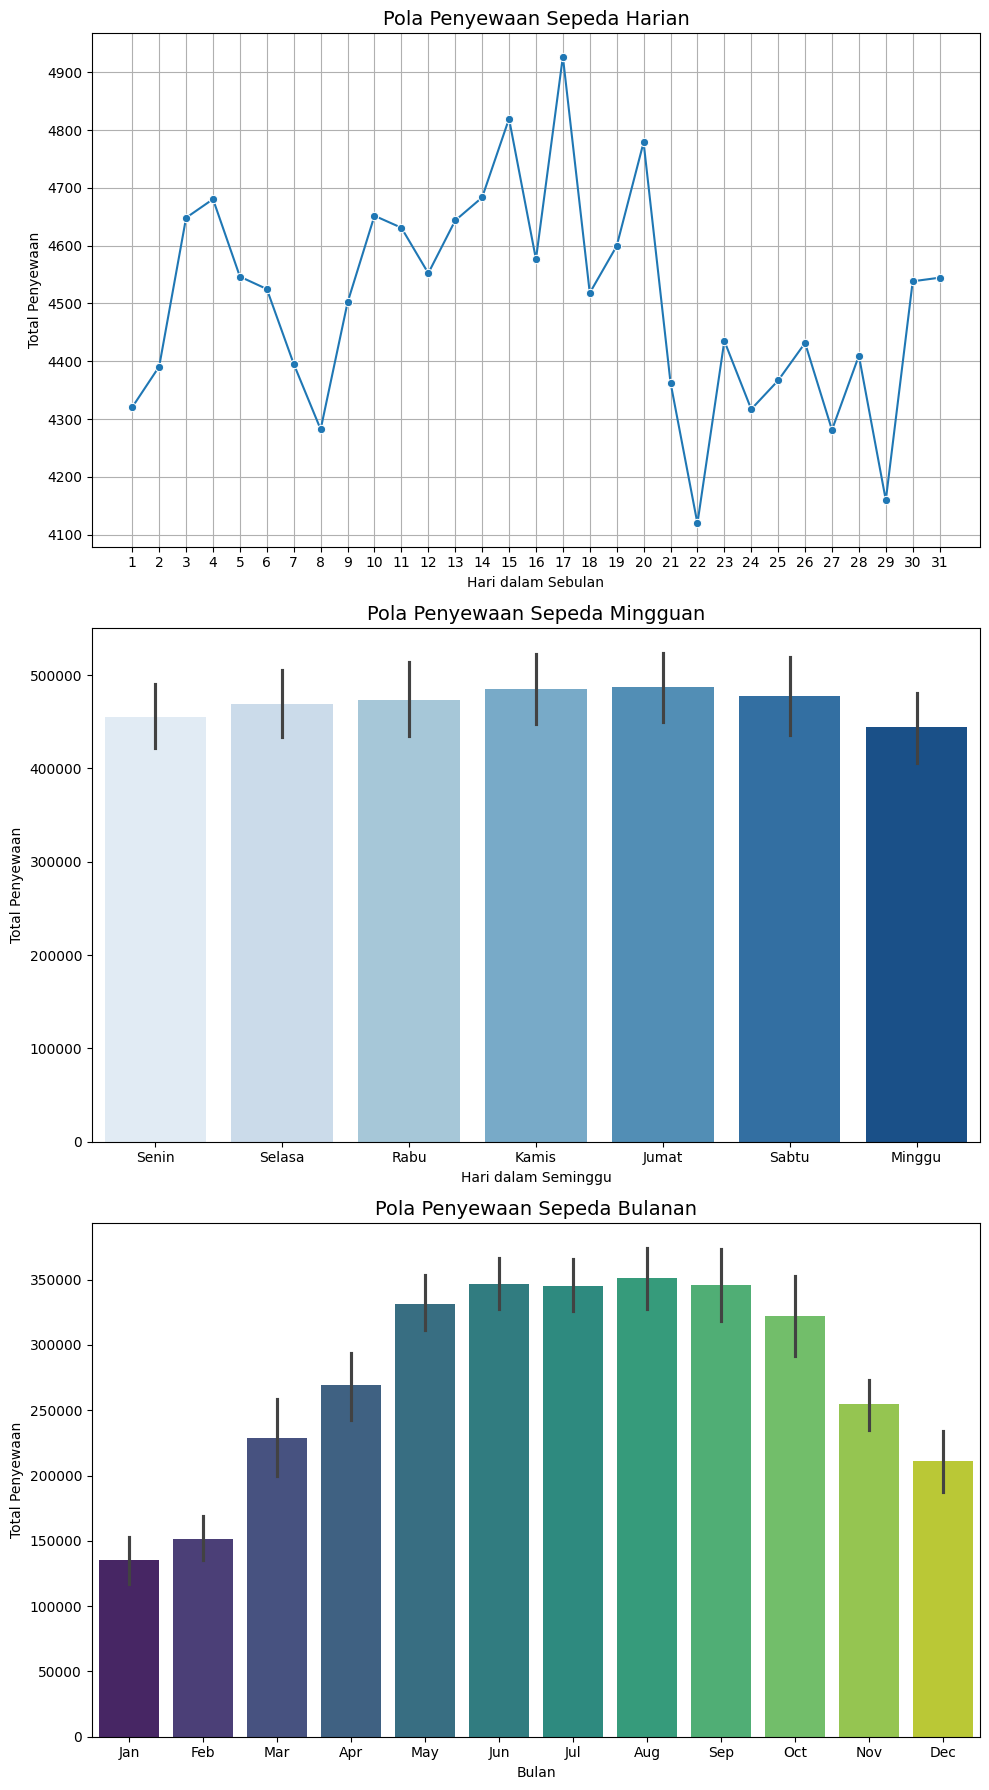

In [3386]:
#Tambahkan kolom waktu
day_df['day'] = day_df['dteday'].dt.day
day_df['weekday'] = day_df['dteday'].dt.dayofweek  # 0 = Senin, 6 = Minggu
day_df['month'] = day_df['dteday'].dt.month

#Buat figure dan axis untuk 3 subplot
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

#Pola Penyewaan Harian
sns.lineplot(x='day', y='cnt', data=day_df, marker='o', ci=None, ax=axes[0])
axes[0].set_title('Pola Penyewaan Sepeda Harian', fontsize=14)
axes[0].set_xlabel('Hari dalam Sebulan')
axes[0].set_ylabel('Total Penyewaan')
axes[0].set_xticks(range(1, 32))
axes[0].grid()

#Pola Penyewaan Mingguan
sns.barplot(x='weekday', y='cnt', data=day_df, estimator=sum, palette='Blues', ax=axes[1])
axes[1].set_title('Pola Penyewaan Sepeda Mingguan', fontsize=14)
axes[1].set_xlabel('Hari dalam Seminggu')
axes[1].set_ylabel('Total Penyewaan')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])

#Pola Penyewaan Bulanan
sns.barplot(x='month', y='cnt', data=day_df, estimator=sum, palette='viridis', ax=axes[2])
axes[2].set_title('Pola Penyewaan Sepeda Bulanan', fontsize=14)
axes[2].set_xlabel('Bulan')
axes[2].set_ylabel('Total Penyewaan')
axes[2].set_xticks(range(12))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Menyesuaikan layout
plt.tight_layout()
plt.show()





**Insight:**
- dapat dilihat pada analisis penyewaan sepeda berdasarkan waktu (harian, mingguan, dan bulanan) yang memperoleh jumlah prediksi untuk manajemen operasional agar pasokan sepeda sesuai dengan permintaan musiman. Dan juga untuk memastikan ketersediaan sepeda yang optimal sepanjang tahun.

### Pertanyaan 4: Pada Jam Berapa jumlah Penyewaan Sepeda Paling Banyak dan Paling Sedikit ?

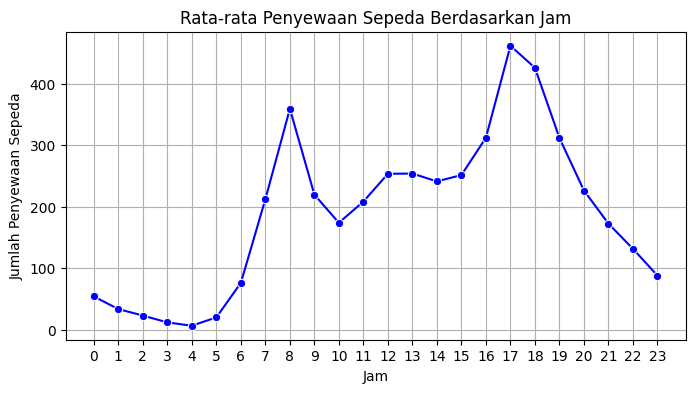

In [3387]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=hour_df['hours'], y=hour_df.groupby('hours')['cnt'].mean(), marker="o", color='b')
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- Dapat dilihat bahwa penyewaan sepeda pada jam 04.00 adalah jumlah penyewa paling rendah sedangkan yang paling tinggi itu pada jam 17.00

### Pertanyaan 5: Apakah Perubahan Suhu Mempengaruhi Jumlah Penyewaan Sepeda

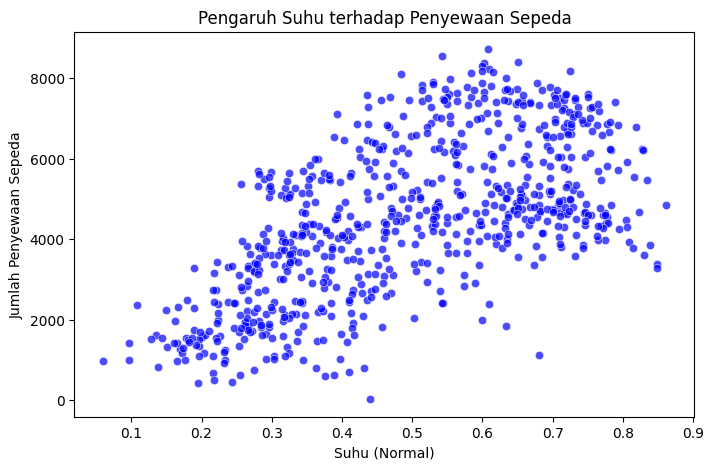

In [3388]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], alpha=0.7, color='b')
plt.title("Pengaruh Suhu terhadap Penyewaan Sepeda")
plt.xlabel("Suhu (Normal)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Dapat dilihat bahwa penyewaan tertinggi terlihat terjadi saat suhu berada di sekitar 0.6 - 0.7 (skala normal), sedangkan Saat suhu sangat rendah (di bawah 0.2) atau sangat tinggi (mendekati 0.8 - 0.9), jumlah penyewaan cenderung menurun.

## Conclusion

- Conclution pertanyaan 1 : Melihat informasi dari korelasi yang ada bahwa setiap faktor memang berpengaruh baik itu dari suhu, musim, dan lainnya walaupun terdapat beberapa faktor yang tidak terlalu signifikan.
- Conclution pertanyaan 2 : Data yang diperoleh untuk penyewaan sepeda berdasarkan hari kerja cenderung sedikit lebih tinggi dibandingkan dengan penyewaan di akhir pekan
- Conclution pertanyaan 3 : Dengan menganalisis tren historis dan faktor eksternal seperti pola penyewaan sepeda berdasarkan waktu tersebut, pihak pengelola dapat menyesuaikan jumlah sepeda yang tersedia agar efisien dan sesuai dengan permintaan di setiap periode.
- Conclution pertanyaan 4 : Terdapat dua puncak waktu penggunaan sepeda tertinggi yang signifikan yaitu pada jam 17.00 dan jam 08.00 
- Conclution pertanyaan 5 : Suhu merupakan faktor lingkungan yang dapat kita katakan sangat berpengaruh terhadap pola penyewaan sepeda.

## Analisis Lanjutan (Opsional)

### Analisis Clustering

Total penyewa sepeda berdasarkan season

In [3389]:
pd.DataFrame(hour_df.groupby(by="season").cnt.nunique().sort_values(ascending=False))


,cnt
season,
summer,760
fall,721
springer,690
winter,482


**Insight :**

Dengan metode binning hasil menunjukkan bahwa penyewa sepeda berdasarkan musim yang tertinggi adalah pada musim panas(summer) dan yang terendah yaitu pada musim dingin atau salju(winter)


In [3390]:
# Menyimpan data yang sudah siap untuk di analisis
hour_df.to_csv('hour_fix.csv', index=False)
day_df.to_csv('day_fix.csv', index = False)